# Part 2 - Introduction to Data Mining -  Project - Martina Galletti r0740962


This project is divided into five parts : 
    
1. From noisy HTML to an ordered dataframe : the content from the html pages is extracted and the dataframe is created
2. Building the Feature's Vectors : different feature's engineering techiniques are applied to the dataset to build a feature vector that can be used to train and evaluate a classifier
3. Training the Models : where four different Machine Learning models are trained and predictions for the web pages of the test set are made. In this part also the accuracy, the precision, the recall and the F1 are applied to the models. 
5. Final Evaluation of the Models and Final Remarks : t-test on the differences of accuracies of the models is applied. 


# 1. From noisy HTML to an ordered dataframe

Text classification could be considered an example of supervised task since the classifier labels the web pages and then re-used them as labels for the test data. The first part of the project mainly involved web page extraction techniques. The web data were already extracted as web pages in an HTML format and divided into a train set and a test set. I used  the BeautifulSoup package to extract content from the HTML data and converting it into an ordered dataframe, using pd.DataFrame.

# 1.1 Loading the Training Data 

Firstly, the packages needed are imported : 

In [1]:
from os import walk
import pandas as pd
import numpy as np
import numpy.ma as ma
import json
import os
import pandas as pd
import re 
from bs4 import BeautifulSoup
from string import punctuation
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

Then, I decided to check that Python was well reading all the 2815 files of the training set. 
At the beginning, I had some problems, since, actually the file loaded where 2819. This was because some Ds_store files were present. I deleted through the terminal and then I printed the list of files to be sure that they were actually deleted. 

In [2]:
path = ("/Users/martinagalletti/Desktop/parte2/data/train")
f = []
for (dirpath,dirnames,filenames) in walk(path):
    f.extend(filenames)    
len(f)

2815

In [3]:
listOfFiles = list()
for (dirpath, dirnames, filenames) in os.walk(path):
    listOfFiles += [os.path.join(file) for file in filenames]
    for elem in listOfFiles:
        print(elem)

http_^^www.cs.ndsu.NoDak.edu^~hex^index.html
http_^^ndsun.cs.ndsu.NoDak.edu^www^nygard^index.html
http_^^vip.cs.utsa.edu^personnel^krobbins.html
http_^^ai.eecs.umich.edu^people^rounds^index.html
http_^^www.cs.utexas.edu^users^rdb^.html
http_^^www.eecs.tulane.edu_80^www^Jennings^.html
http_^^www.cc.gatech.edu^staff^f^freeman^freeman.html
http_^^www.cs.unm.edu^~maccabe^.html
http_^^www.cs.uml.edu^~grinstei^.html
http_^^www.cs.rochester.edu^u^martin^.html
http_^^www.cs.wm.edu^~simha^.html
http_^^web.cps.msu.edu^fac^fac^lee.html
http_^^www.cs.berkeley.edu^People^Faculty^Homepages^stonebraker.html
http_^^www.mtsu.edu^academic^compsci^faculty^Hankins.html
http_^^www-cse.ucsd.edu^users^flaviu^.html
http_^^cis.csuohio.edu^~fadlalla^.html
http_^^www.cc.gatech.edu^gvu^people^Faculty^Jessica.K.Hodgins.html
http_^^www-cse.ucsd.edu^users^gary^.html
http_^^www.das.harvard.edu^users^faculty^Brad_Chen^Brad_Chen.html
http_^^www.cs.rutgers.edu^~hirsh^index.html
http_^^www.cs.buffalo.edu^pub^WWW^faculty^

http_^^www.cs.tamu.edu^faculty^pradhan^.html
http_^^cs.nyu.edu^cs^faculty^boppana^index.html
http_^^www.cs.umd.edu^~perlis^.html
http_^^www.cs.uiuc.edu^CS_INFO_SERVER^DEPT_INFO^CS_FACULTY^FAC_HTMLS^wilkins.html
http_^^www.cs.washington.edu^homes^shapiro.html
http_^^www.pcmp.caltech.edu^~dick^.html
http_^^www.cs.uidaho.edu^~frincke^.html
http_^^www.cs.ucsb.edu^~ibarra^.html
http_^^www.cs.washington.edu^homes^anderson^.html
http_^^vip.cs.utsa.edu^personnel^srobbins.html
http_^^www.cs.rpi.edu^brochure^Faculty^mcnaughton.html
http_^^www.cs.wisc.edu^~pubs^faculty-info^miron.html
http_^^www.cc.gatech.edu^gvu^people^Faculty^Larry.F.Hodges.html
http_^^cs.millersv.edu^~katz^.html
http_^^www.cs.vassar.edu^faculty^manning.html
http_^^www.cs.wisc.edu^~larus^larus.html
http_^^www.cs.ucsb.edu^~cappello^.html
http_^^www.cs.washington.edu^homes^dickey^.html
http_^^www.cis.ufl.edu^~jnw^.html
http_^^www.cs.umd.edu^~tripathi^.html
http_^^www.cs.berkeley.edu^People^Faculty^Homepages^sangiovanni.html
http_

http_^^www.mtsu.edu^academic^compsci^faculty^Thweatt.html
http_^^www.cs.umd.edu^~stewart^.html
http_^^www.cs.unm.edu^CS_Dept^faculty^homepage^smith.html
http_^^www.cs.umd.edu^~reggia^.html
http_^^cs-www.bu.edu^faculty^heddaya^.html
http_^^www.cs.utexas.edu^users^UTCS^report^1995^profiles^jenevein.html
http_^^www-cse.ucsd.edu^users^kuan^.html
http_^^www.cs.uiuc.edu^CS_INFO_SERVER^DEPT_INFO^CS_FACULTY^FAC_HTMLS^cliu.html
http_^^www.csc.ncsu.edu^directory^bio^RRodman.html
http_^^www.cs.buffalo.edu^pub^WWW^faculty^sreejit^.html
http_^^www.eecs.umich.edu^~stephane^.html
http_^^www.cs.uidaho.edu^~setl^oman.html
http_^^www-ml.cs.umass.edu^~utgoff^.html
http_^^www.cs.ucsb.edu^~agrawal^.html
http_^^www.cs.ndsu.NoDak.edu^~gammill^index.html
http_^^cs.nyu.edu^cs^faculty^greenbau^index.html
http_^^www.cs.utexas.edu^users^UTCS^report^1995^profiles^martin.html
http_^^www.cs.uiuc.edu^CS_INFO_SERVER^DEPT_INFO^CS_FACULTY^FAC_HTMLS^dejong.html
http_^^web.cps.msu.edu^~mckinley^.html
http_^^cs.nyu.edu^cs^

http_^^www.cs.cornell.edu^Info^Courses^Current^CS611^home.html
http_^^www.cs.washington.edu^education^courses^590s^au95^index.html
http_^^www.cs.uoregon.edu^classes^cis314^.html
http_^^www.cs.washington.edu^education^courses^142^CurrentQtr^.html
http_^^www.cs.wisc.edu^~mbirk^cs302^.html
http_^^www.cs.washington.edu^education^courses^421^.html
http_^^www.cs.cornell.edu^Info^Projects^NuPrl^cs611^CS611.html
http_^^www.cs.uiowa.edu^~herman^22C021^index.html
http_^^www.deas.harvard.edu^cs^academics^courses^cs287r^cs287r.html
http_^^www.cs.wisc.edu^~cs110^cs110.html
http_^^www.cs.bu.edu^students^grads^oira^cs112^.html
http_^^www-cse.stanford.edu^classes^cs50^.html
http_^^www.cis.ksu.edu^~schmidt^teaching^705.syllabus.html
http_^^www.cs.bu.edu^faculty^sclaroff^courses^cs480-96^Home.html
http_^^edlab-www.cs.umass.edu^cs691e^.html
http_^^www-cse.stanford.edu^classes^cs198^.html
http_^^www-leland.stanford.edu^class^cs205^.html
http_^^www.cs.uoregon.edu^classes^cis441^.html
http_^^osm7.cs.byu.edu

http_^^www.eecs.umich.edu^systems^khargonekar.html
http_^^www.cs.ucdavis.edu^Faculty^Gusfield.html
http_^^acsl.cs.uiuc.edu_80^~kaplan^.html
http_^^www.cs.rutgers.edu^~dls^index.html
http_^^www.cs.rutgers.edu^~ryder^index.html
http_^^www-acaps.cs.mcgill.ca^~gao^.html
http_^^www.cis.uab.edu^info^faculty^reilly^reilly.html
http_^^www.cs.wisc.edu^~olvi^olvi.html
http_^^www.cs.utexas.edu^users^UTCS^report^1995^profiles^gallagher.html
http_^^www.cc.gatech.edu^computing^SW_Eng^people^Faculty^Colin.Potts.html
http_^^www.cs.uml.edu^~haim^.html
http_^^www.cs.cornell.edu^Info^Department^Annual95^Faculty^Hartmanis.html
http_^^HTTP.CS.Berkeley.EDU^~randy^.html
http_^^www.cs.pitt.edu^~don^.html
http_^^www.cs.unm.edu^CS_Dept^faculty^homepage^knudsen.html
http_^^www.cs.hmc.edu^~hodas^.html
http_^^www.cs.uml.edu^Faculty^JamesCanning.html
http_^^web.cps.msu.edu^~ni^.html
http_^^www.cs.washington.edu^people^faculty^snyder.html
http_^^www.cs.pitt.edu^~moir^.html
http_^^web.cps.msu.edu^~chengb^.html
http_^

http_^^www.cs.jhu.edu^~jonathan^jonathan.txt.html
http_^^www.cs.utexas.edu^users^bert^.html
http_^^www.cs.nmsu.edu^~kbisset^.html
http_^^www.cs.utexas.edu^users^martym^.html
http_^^www.cs.wisc.edu^~zhe^zhe.txt.html
http_^^www.ics.uci.edu^~kmorse^.html
http_^^www.cs.mcgill.ca^~kuoktou^.html
http_^^www.das.harvard.edu^users^students^Rebecca_Hwa^Rebecca_Hwa.txt.html
http_^^www.cs.washington.edu^homes^hauck^.html
http_^^www.cs.ualberta.ca^~srini^.html
http_^^www.cs.ualberta.ca^~kube^.html
http_^^www-cse.ucsd.edu^users^mland^.html
http_^^www.cs.rochester.edu^u^rao^.html
http_^^www.cs.yale.edu^HTML^YALE^CS^HyPlans^mirani-rajiv.html
http_^^www.cs.wisc.edu^~subbarao^subbarao.txt.html
http_^^www.cs.ucr.edu^~ychiu^.html
http_^^ai.eecs.umich.edu^people^vanlent^homepage.txt.html
http_^^www.cs.pitt.edu^~skyking^.html
http_^^www.cs.wisc.edu^~leavy^leavy.txt.html
http_^^www.vuse.vanderbilt.edu^~whitley^.html
http_^^www.cs.wisc.edu^~twang^twang.html
http_^^www.cs.cornell.edu^Info^People^sxsrivas^sxsri

# 1.2. Web Scraping with Beautiful Soup 

Then, I defined the function to load the files the training data. Firstly, I created an empty data frame with index and six different columns. I implemented two loops, as seen in the exercise session, since the training data were divided into three different subcategories. The different columns are filled thanks to the Beautiful Soup package and the method find_all.
The function is then called and the training data are loaded. 
I used the html5libe as a parser since even if it's slower, it parses pages as the web browser does;  I thought it was particularly convenient for this type of dataset.

In [4]:
def read_train_data(path):
    train_data = pd.DataFrame(index=[], columns=['url_of_file','course', 'professor', 'student','text','category'])
    i = 0
    for cat in os.listdir(path):
        for f in os.listdir(os.path.join(path, cat)): 
            with open(os.path.join(path, cat, f), encoding='utf8',errors = 'replace') as page:
                t=re.findall('\w+', f)
                t.pop(0)
                g=[]
                for item in t:
                    if '_' in item:
                        w=item.split('_')
                        for sep in w:
                            g.append(sep.lower())
                    else:
                        g.append(item.lower())
                url_of_file = ' '.join(g)
                html = BeautifulSoup(page, 'html5lib')
                text = html.get_text()
                text = text.translate(punctuation)
                course = 1 if html.find_all(string=re.compile("course")) else 0
                professor=1 if html.find_all(string=re.compile("professor")) else 0
                student=1 if html.find_all(string=re.compile("student")) else 0
                train_data.loc[i] = [url_of_file, course, professor, student, text, cat]
                
                i = i + 1
    try:
        return train_data
    except IOError as exc:
        if exc.errno != errno.EISDIR:
            raise

In [5]:
train_data = read_train_data("/Users/martinagalletti/Desktop/parte2/data/train")

In [6]:
train_data

,url_of_file,course,professor,student,text,category
0,www cs ndsu nodak edu hex index html,0,0,0,"Date: Mon, 25 Nov 1996 22:10:50 GMT+Server: NC...",faculty
1,ndsun cs ndsu nodak edu www nygard index html,0,0,0,"Date: Monday, 25-Nov-96 22:10:11 GMT+Server: N...",faculty
2,vip cs utsa edu personnel krobbins html,0,0,0,"Date: Mon, 25 Nov 1996 23:26:47 GMT+Server: NC...",faculty
3,ai eecs umich edu people rounds index html,0,0,0,"Date: Mon, 25 Nov 1996 23:10:21 GMT+Server: NC...",faculty
4,www cs utexas edu users rdb html,0,0,0,MIME-Version: 1.0+Server: CERN/3.0+Date: Monda...,faculty
5,www eecs tulane edu 80 www jennings html,0,0,1,"Date: Monday, 25-Nov-96 22:49:26 GMT+Server: N...",faculty
6,www cc gatech edu staff f freeman freeman html,0,0,0,"Date: Wed, 20 Nov 1996 22:48:22 GMT+Server: Ap...",faculty
7,www cs unm edu maccabe html,0,0,1,"Date: Mon, 25 Nov 1996 23:19:18 GMT+Server: NC...",faculty
8,www cs uml edu grinstei html,0,0,0,"Date: Thu, 21 Nov 1996 20:52:45 GMT+Server: NC...",faculty
9,www cs rochester edu u martin html,1,0,0,"Date: Thursday, 21-Nov-96 21:01:36 GMT+Server:...",faculty


# 1.3. Exploring the Dataset

The dataset at this point is created and the data visualization part can begin. First of all, I printed the shape of my data(the type and the attributes), to be sure that actually I created the correct dataset. Then, I printed the type of each attributes and the first lines of my dataset. 

In [7]:
print(train_data.shape)

(2815, 6)


In [8]:
print('There are ' + str(train_data.shape[0]) + ' records')
print('There are ' + str(train_data.columns.size) + ' attributes:')
train_data_types = train_data.dtypes
print(train_data_types)
train_data.head()

There are 2815 records
There are 6 attributes:
url_of_file    object
course         object
professor      object
student        object
text           object
category       object
dtype: object


,url_of_file,course,professor,student,text,category
0,www cs ndsu nodak edu hex index html,0,0,0,"Date: Mon, 25 Nov 1996 22:10:50 GMT+Server: NC...",faculty
1,ndsun cs ndsu nodak edu www nygard index html,0,0,0,"Date: Monday, 25-Nov-96 22:10:11 GMT+Server: N...",faculty
2,vip cs utsa edu personnel krobbins html,0,0,0,"Date: Mon, 25 Nov 1996 23:26:47 GMT+Server: NC...",faculty
3,ai eecs umich edu people rounds index html,0,0,0,"Date: Mon, 25 Nov 1996 23:10:21 GMT+Server: NC...",faculty
4,www cs utexas edu users rdb html,0,0,0,MIME-Version: 1.0+Server: CERN/3.0+Date: Monda...,faculty


### 1.3.1. Check if some value is empty

First of all, I checked if some value is empty in order to deal with missing values. But no data appear to be null. 

In [9]:
train_data.isnull()

,url_of_file,course,professor,student,text,category
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


### 1.3.2. Visualizing the Dataset  before building the feature's vector

I performed some additional data visualization on the dataset to be sure that the dataset was correctly created. 

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [11]:
train_data.describe()

,url_of_file,course,professor,student,text,category
count,2815,2815,2815,2815,2815,2815
unique,2813,2,2,2,2468,4
top,www cs ucr edu bao html,0,0,0,,student
freq,2,2301,2748,2112,348,1443


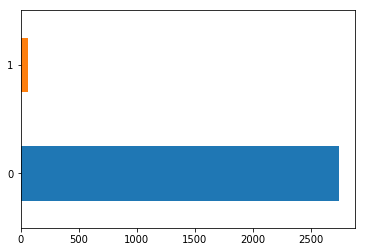

In [12]:
train_data['professor'].value_counts().plot(kind='barh')

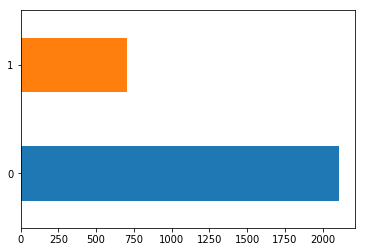

In [13]:
train_data['student'].value_counts().plot(kind='barh')

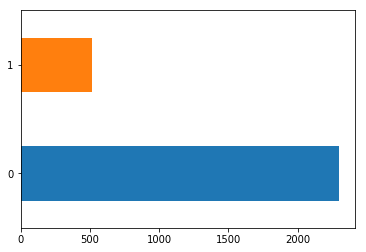

In [14]:
train_data['course'].value_counts().plot(kind='barh')

In [15]:
train_data.count()

url_of_file    2815
course         2815
professor      2815
student        2815
text           2815
category       2815
dtype: int64

In [16]:
train_data.count(axis="columns")

0       6
1       6
2       6
3       6
4       6
5       6
6       6
7       6
8       6
9       6
10      6
11      6
12      6
13      6
14      6
15      6
16      6
17      6
18      6
19      6
20      6
21      6
22      6
23      6
24      6
25      6
26      6
27      6
28      6
29      6
       ..
2785    6
2786    6
2787    6
2788    6
2789    6
2790    6
2791    6
2792    6
2793    6
2794    6
2795    6
2796    6
2797    6
2798    6
2799    6
2800    6
2801    6
2802    6
2803    6
2804    6
2805    6
2806    6
2807    6
2808    6
2809    6
2810    6
2811    6
2812    6
2813    6
2814    6
Length: 2815, dtype: int64

In [17]:
train_data.isna

<bound method DataFrame.isna of                                             url_of_file course professor  \
0                  www cs ndsu nodak edu hex index html      0         0   
1         ndsun cs ndsu nodak edu www nygard index html      0         0   
2               vip cs utsa edu personnel krobbins html      0         0   
3            ai eecs umich edu people rounds index html      0         0   
4                      www cs utexas edu users rdb html      0         0   
5              www eecs tulane edu 80 www jennings html      0         0   
6        www cc gatech edu staff f freeman freeman html      0         0   
7                           www cs unm edu maccabe html      0         0   
8                          www cs uml edu grinstei html      0         0   
9                    www cs rochester edu u martin html      1         0   
10                             www cs wm edu simha html      0         0   
11                     web cps msu edu fac fac lee html 

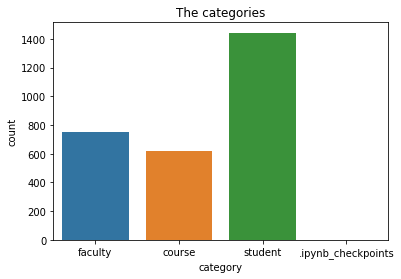

In [18]:
hist = sns.countplot(x='category', data=train_data)
hist.set_title('The categories');

In [19]:
print(train_data['category'])

0                  faculty
1                  faculty
2                  faculty
3                  faculty
4                  faculty
5                  faculty
6                  faculty
7                  faculty
8                  faculty
9                  faculty
10                 faculty
11                 faculty
12                 faculty
13                 faculty
14                 faculty
15                 faculty
16                 faculty
17                 faculty
18                 faculty
19                 faculty
20                 faculty
21                 faculty
22                 faculty
23                 faculty
24                 faculty
25                 faculty
26                 faculty
27                 faculty
28                 faculty
29                 faculty
               ...        
2785               student
2786               student
2787               student
2788               student
2789               student
2790               student
2

In [20]:
mask = train_data['category'].isin(['.ipynb_checkpoints'])
train_data[~mask]

,url_of_file,course,professor,student,text,category
0,www cs ndsu nodak edu hex index html,0,0,0,"Date: Mon, 25 Nov 1996 22:10:50 GMT+Server: NC...",faculty
1,ndsun cs ndsu nodak edu www nygard index html,0,0,0,"Date: Monday, 25-Nov-96 22:10:11 GMT+Server: N...",faculty
2,vip cs utsa edu personnel krobbins html,0,0,0,"Date: Mon, 25 Nov 1996 23:26:47 GMT+Server: NC...",faculty
3,ai eecs umich edu people rounds index html,0,0,0,"Date: Mon, 25 Nov 1996 23:10:21 GMT+Server: NC...",faculty
4,www cs utexas edu users rdb html,0,0,0,MIME-Version: 1.0+Server: CERN/3.0+Date: Monda...,faculty
5,www eecs tulane edu 80 www jennings html,0,0,1,"Date: Monday, 25-Nov-96 22:49:26 GMT+Server: N...",faculty
6,www cc gatech edu staff f freeman freeman html,0,0,0,"Date: Wed, 20 Nov 1996 22:48:22 GMT+Server: Ap...",faculty
7,www cs unm edu maccabe html,0,0,1,"Date: Mon, 25 Nov 1996 23:19:18 GMT+Server: NC...",faculty
8,www cs uml edu grinstei html,0,0,0,"Date: Thu, 21 Nov 1996 20:52:45 GMT+Server: NC...",faculty
9,www cs rochester edu u martin html,1,0,0,"Date: Thursday, 21-Nov-96 21:01:36 GMT+Server:...",faculty


In [21]:
def new_read_train_data(path):
    new_train_data = pd.DataFrame(index=[], columns=['url_of_file','course', 'professor', 'student','text','category'])
    i = 0
    for cat in os.listdir(path):
        for f in os.listdir(os.path.join(path, cat)): 
            if '.ipynb_checkpoints' not in path:
                with open(os.path.join(path, cat, f), encoding='utf8',errors = 'replace') as page:
                    t=re.findall('\w+', f)
                    t.pop(0)
                    g=[]
                    for item in t:
                        if '_' in item:
                            w=item.split('_')
                            for sep in w:
                                g.append(sep.lower())
                        else:
                            g.append(item.lower())
                    url_of_file = ' '.join(g)
                    html = BeautifulSoup(page, 'html5lib')
                    text = html.get_text()
                    text = text.translate(punctuation)
                    course = 1 if html.find_all(string=re.compile("course")) else 0
                    professor=1 if html.find_all(string=re.compile("professor")) else 0
                    student=1 if html.find_all(string=re.compile("student")) else 0
                    train_data.loc[i] = [url_of_file, course, professor, student, text, cat]
                
                    i = i + 1
    try:
        return new_train_data
    except IOError as exc:
        if exc.errno != errno.EISDIR:
            raise

In [22]:
new_train_data = new_read_train_data("/Users/martinagalletti/Desktop/parte2/data/train")

# 2. Building the feature's vector

In [37]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

First of all, I normalized the categorical and numerical data present in the CSV file in order to fill the values missing. Secondly, I deleted the stop words, importing the package "from nltk.corpus import stopwords". 

## 2.1. Numerical Imputation

In [24]:
train_data = train_data.fillna(0)

## 2.2 Categorical Imputation

In [25]:
train_data['text'].fillna(train_data['text'].value_counts()
.fillna('Other'), inplace=True)

## 2.3. Deleting Stop Words

In [26]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [27]:
train_data['text'].apply(lambda x: [item for item in x if item not in stop])

0       [D, e, :,  , M, n, ,,  , 2, 5,  , N, v,  , 1, ...
1       [D, e, :,  , M, n, ,,  , 2, 5, -, N, v, -, 9, ...
2       [D, e, :,  , M, n, ,,  , 2, 5,  , N, v,  , 1, ...
3       [D, e, :,  , M, n, ,,  , 2, 5,  , N, v,  , 1, ...
4       [M, I, M, E, -, V, e, r, n, :,  , 1, ., 0, +, ...
5       [D, e, :,  , M, n, ,,  , 2, 5, -, N, v, -, 9, ...
6       [D, e, :,  , W, e, ,,  , 2, 0,  , N, v,  , 1, ...
7       [D, e, :,  , M, n, ,,  , 2, 5,  , N, v,  , 1, ...
8       [D, e, :,  , T, h, u, ,,  , 2, 1,  , N, v,  , ...
9       [D, e, :,  , T, h, u, r, ,,  , 2, 1, -, N, v, ...
10      [D, e, :,  , M, n, ,,  , 2, 5,  , N, v,  , 1, ...
11      [D, e, :,  , T, h, u, ,,  , 2, 1,  , N, v,  , ...
12      [D, e, :,  , T, h, u, ,,  , 2, 1,  , N, v,  , ...
13      [D, e, :,  , M, n, ,,  , 2, 5,  , N, v,  , 1, ...
14      [D, e, :,  , T, h, u, ,,  , 2, 1,  , N, v,  , ...
15      [M, I, M, E, -, V, e, r, n, :,  , 1, ., 0, +, ...
16      [D, e, :,  , T, u, e, ,,  , 1, 4,  , J, n,  , ...
17      [D, e,

## 2.3. Bag of Words representation

The bag of words representation is the  simplest way to transform each words of the training set in a numerical value. Bag Of Words counts the frequency of words in a document and it attrobutes two values : a fixed-id and the number of times that words was found in the data. The output of the bag of words is then a frequency vector and a vocabulary of all the unique words occuring in all the documents in the training set is created. 


In [28]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train_data['text'])
print(X_train_counts.shape)

(2815, 38044)


In [29]:
X_train_counts

<2815x38044 sparse matrix of type '<class 'numpy.int64'>'
	with 380124 stored elements in Compressed Sparse Row format>

In [30]:
count_vect.vocabulary_.get('document')

13974

In [31]:
print(X_train_counts.toarray())  

[[1 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [32]:
print(X_train_counts)


  (0, 14529)	1
  (0, 17559)	1
  (0, 22838)	1
  (0, 37578)	1
  (0, 13394)	1
  (0, 12474)	1
  (0, 37156)	1
  (0, 18458)	1
  (0, 25476)	1
  (0, 7285)	1
  (0, 20107)	1
  (0, 34886)	1
  (0, 8281)	1
  (0, 33333)	1
  (0, 18321)	1
  (0, 35582)	1
  (0, 30449)	1
  (0, 34865)	1
  (0, 15201)	1
  (0, 32280)	1
  (0, 36649)	1
  (0, 28709)	1
  (0, 19528)	1
  (0, 10409)	1
  (0, 5679)	1
  :	:
  (2814, 1756)	1
  (2814, 18533)	1
  (2814, 25489)	3
  (2814, 9593)	1
  (2814, 16712)	5
  (2814, 19513)	13
  (2814, 16428)	5
  (2814, 37239)	2
  (2814, 6620)	5
  (2814, 29248)	2
  (2814, 25908)	7
  (2814, 22120)	1
  (2814, 18962)	9
  (2814, 34208)	8
  (2814, 35243)	1
  (2814, 11338)	3
  (2814, 2142)	1
  (2814, 24340)	1
  (2814, 21868)	4
  (2814, 25121)	1
  (2814, 31367)	1
  (2814, 17330)	2
  (2814, 1431)	2
  (2814, 25641)	1
  (2814, 12812)	1


In [33]:
print(count_vect.get_feature_names())

['00', '000', '000000', '0000682', '0000b0', '0000ee', '0002', '0004', '0007', '000th', '001', '0010', '0011', '0012', '0017', '0018', '002', '0021', '002cc', '003', '0030', '0033', '0036', '004', '0046', '0048', '005', '0050', '0053', '0056', '005a94', '006', '007', '0077', '008', '0080', '0083', '009', '0092', '0094', '009a', '00__', '00a', '00am', '00colloquium', '00danerickaychrisdan', '00josejosekayjosejp', '00kaykylesteveericvasantha', '00p', '00pm', '00research', '00theory', '00upson', '01', '010', '01002', '01003', '0101', '0103', '011', '0114', '01199', '012', '0122', '0126', '0135', '014', '0140', '015', '016', '0161', '01749', '0182', '01824', '0188', '0191', '0193', '0196', '01oct', '01pm', '02', '020', '0201', '0201572869', '0203', '02062', '0206ac', '021', '02115', '02129', '02135', '02138', '02139', '02141', '02142', '02143', '02148', '0215', '02154', '02155', '0216', '02166', '02181', '02215', '022443', '0226', '0227', '024', '0246', '025', '0253', '0256', '0272', '0273

Bag of Words has some limitation since as in this case the vector size of a large document is huge and it results in a lot of computation and time. 

## 2.4. Word Frequencies with TfidfVectorizer

The average count of long documents will be higher than short documents. We use tf for Term Frequencies to avoid this discrepancy by dividing the number of occurences of each word in a document by the total number of words in a document.

In [38]:
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(2815, 38044)

In [39]:
X_train_tf

<2815x38044 sparse matrix of type '<class 'numpy.float64'>'
	with 380124 stored elements in Compressed Sparse Row format>

A further refinement is to downscale weights for words that occur in many 
documents in the corpus and are therefore less informative than those that occur only in a smaller portion of the corpus.

In [40]:
texts = train_data['text'].astype('str')

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), 
                                   min_df = 2, 
                                   max_df = .95)

transformer = TfidfTransformer(use_idf=True).fit(X_train_tf)
X_train_tfidf = transformer.transform(X_train_tf)
X_train_tfidf.shape

(2815, 38044)

In [41]:
X_train_tfidf

<2815x38044 sparse matrix of type '<class 'numpy.float64'>'
	with 380124 stored elements in Compressed Sparse Row format>

## 2.5. Dimensionality Reduction with Truncated SVD

Since the dimension of the features was really big, I performed a linear dimensionality reduction using Truncated SVD :  only the 100 best features per category will be used. I know that using this type of features vectors, I will have a really little accuracy with the Naive Bayes, but I hope to get anhigher accuracy with RandomForest

In [42]:
lsa = TruncatedSVD(n_components=100, 
                   n_iter=20, 
                   random_state=3)

X_train_lsa = lsa.fit_transform(X_train_tfidf)
X_train_lsa.shape

(2815, 100)

In [43]:
print (X_train_lsa)

[[ 2.34997251e-01  4.28506123e-02 -1.54542733e-01 ... -8.77387437e-03
   8.21174197e-05  1.27647643e-02]
 [ 2.50061335e-01  2.43632862e-02 -9.84822964e-02 ... -1.40092124e-02
  -9.37447942e-03  3.53255643e-02]
 [ 3.12234347e-01  5.30961285e-02 -1.47424933e-01 ...  1.58316045e-02
  -1.04402052e-02  3.87015484e-02]
 ...
 [ 3.60593616e-01  7.87013958e-02 -7.79801045e-02 ... -1.58379934e-02
  -1.22785517e-02  1.09638935e-02]
 [ 3.43895805e-01  7.08298695e-02  3.39172019e-02 ...  1.18281985e-02
  -3.58891215e-03 -7.89955923e-02]
 [ 1.93823017e-02  7.34950224e-03  5.46685915e-03 ... -1.76120515e-03
  -6.23684029e-04 -3.19395365e-03]]


## 2.6. Storing all the features in featurematrix.csv

My entire data matrix containing the features I created it's then written to a file called ”featurematrix.csv

In [44]:
import numpy
a = X_train_lsa
numpy.savetxt("featurematrix.csv", a, delimiter=",")

# 3. Training the Models

In this part I trained different models on my data. This part is composed of three different parts :  

5.1. The Test data are loaded

5.2. The Models are imported. 

5.3. The Model is trained and the predictions are made. 


In [45]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import make_classification

## 3.1. Test Data Load 

The function to load the test data is defined only once and it is the following : 

In [46]:
def read_test_data(path):
    test_data = pd.DataFrame(index=[], columns=['file_name','text'])
    i = 0
    for f in os.listdir(path):
       
            with open(os.path.join(path, f), encoding='utf-8', errors='ignore') as page:
                t=re.findall('\w+', f)
                t.pop(0)
                g=[]
                for item in t:
                    if '_' in item:
                        w=item.split('_')
                        for sep in w:
                            g.append(sep.lower())
                    else:
                        g.append(item.lower())
                file_name= ' '.join(g)
                
                html = BeautifulSoup(page,'html.parser')
                content = html.get_text()
               
                test_data.loc[i] = [file_name,content]
                i = i + 1
    return test_data

In [47]:
test_data = read_test_data('/Users/martinagalletti/Desktop/parte2/data/test')

In [48]:
test_data

,file_name,text
0,anytime cs umass edu shlomo classes 383 index ...,"Date: Wed, 20 Nov 1996 23:20:59 GMT\nServer: N..."
1,cs nyu edu cs dept info course home pages fall...,"Date: Tue, 26 Nov 1996 18:48:00 GMT\nServer: N..."
2,www cs mcgill ca czamora,"Date: Tue, 26 Nov 1996 02:55:31 GMT\nServer: A..."
3,www cs wisc edu dyer dyer html,"Date: Thu, 07 Nov 1996 19:07:00 GMT\nServer: N..."
4,www seas upenn edu cse370 cse370 cse370 html,Server: Netscape-Commerce/1.12\nDate: Wednesda...
5,www cs cornell edu info people vitrano vitrano...,MIME-Version: 1.0\nServer: CERN/3.0\nDate: Wed...
6,www cs nmsu edu 80 pfeiffer cs474,"Date: Wednesday, 15-Jan-97 00:21:03 GMT\nServe..."
7,www cs cornell edu info people jshapiro jshapi...,MIME-Version: 1.0\nServer: CERN/3.0\nDate: Wed...
8,www cs wisc edu amos amos html,"Date: Thu, 07 Nov 1996 19:08:56 GMT\nServer: N..."
9,www cs wisc edu schnarr schnarr html,"Date: Thu, 07 Nov 1996 19:14:22 GMT\nServer: N..."


## 3.2. The Models

### 3.2.1 Probabilistic Classifier : Multinomial Naive Bayes Classifier

First of all, we import and we train our first model : a Multinomial Naive Bayes. 

In [49]:
clf_MNB = MultinomialNB()
y_pred = clf_MNB.fit(X_train_tfidf, train_data['category'])

In [50]:
X_test_counts = count_vect.transform(test_data['text'])
X_test_tfidf = transformer.transform(X_test_counts)

And we predict the outcome: 

In [51]:
clf_MNB.predict(X_test_tfidf)

array(['course', 'course', 'student', ..., 'faculty', 'student',
       'student'], dtype='<U18')

### 3.2.2. Ensemble Classifier : Random Forest

Secondly I chose a Random Forrest Model classifier as example of Ensemble model since it usually avoids over-fitting, introducing randomness in my data. For this type of classifier, the truncated features SVD seemed to be the best option based on the accuracy I was getting. In fact, using these features, instead of the tf-idf, increased the accuracy of 10 points.

In [52]:
X, y = make_classification(n_samples=1000, n_features=38044,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf_RF = RandomForestClassifier(n_estimators=50, max_depth=2,
                            random_state=0)
clf_RF.fit(X_train_lsa, train_data['category'])  
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
print(clf_RF.feature_importances_)

[0.13757036 0.03249141 0.18803552 0.1669999  0.05575092 0.
 0.00258028 0.04343967 0.01409785 0.0015028  0.00403424 0.01522209
 0.00094708 0.01494582 0.         0.         0.10556384 0.0075034
 0.01904658 0.         0.         0.         0.03635502 0.00740553
 0.00133968 0.         0.00149006 0.         0.         0.
 0.         0.         0.00230322 0.01660441 0.00473276 0.
 0.00293574 0.00298265 0.         0.         0.0239205  0.00335222
 0.         0.00599517 0.         0.0021285  0.         0.
 0.00578411 0.         0.00093578 0.00088194 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.01171949 0.         0.01636262 0.00431158 0.
 0.00228847 0.         0.         0.         0.006902   0.
 0.         0.         0.         0.         0.         0.00360121
 0.         0.         0.         0.         0.00282983 0.
 0.         0.00578856 0.         0.01712218 0.00019501 0.
 0.         0.         0.         0.         0.         0.
 0.         0.   

In [53]:
clf_RF.predict(X_train_lsa)

array(['student', 'faculty', 'student', ..., 'student', 'student',
       'student'], dtype=object)

### 3.3.3 Linear Classifier : Stochastic Gradient Descent

In [54]:
clf_SGD= SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf_SGD.fit(X_train_tf, train_data['category'])   
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
           early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
           l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=100,
           n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
           random_state=None, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

/Users/martinagalletti/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=100, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [55]:
clf_SGD.predict(X_test_tfidf)

array(['course', 'course', 'student', ..., 'faculty', 'student',
       'student'], dtype='<U18')

### 3.3.4 Dummy Classifier

In [56]:
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train_tfidf, train_data['category'])

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [57]:
y_pred_DC = dummy.predict(X_test_tfidf)

In [58]:
y_pred_DC

array(['student', 'student', 'student', ..., 'student', 'student',
       'student'], dtype='<U7')

## 4. The Evaluation 

After the training and the prediction of the category of the models, it's time to do the evaluation part. 

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score


## 4.1 Accuracy for all the models

### Multinomial Naive Bayes

In [60]:
accuracy_MNB = clf_MNB.score(X_train_tfidf, train_data['category'])
print(accuracy_MNB) 

0.8756660746003553


In [61]:
accuracy = cross_val_score(clf_MNB, X_train_tfidf, train_data['category'], scoring='accuracy', cv = 10)
print(accuracy)
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

/Users/martinagalletti/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[0.77464789 0.79787234 0.78723404 0.78647687 0.81494662 0.79715302
 0.80071174 0.80071174 0.80071174 0.77224199]
Accuracy of Model with Cross Validation is: 79.3270800695747


### Random Forest

In [62]:
accuracy_RF = clf_RF.score(X_train_lsa, train_data['category'])
print(accuracy_RF)

0.7072824156305506


In [63]:
accuracy = cross_val_score(clf_RF, X_train_lsa, train_data['category'], scoring='accuracy', cv = 10)
print(accuracy)
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

/Users/martinagalletti/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[0.68661972 0.69858156 0.73049645 0.68683274 0.71174377 0.70462633
 0.69039146 0.71886121 0.70818505 0.68683274]
Accuracy of Model with Cross Validation is: 70.23171042102797


### Stochastic Gradient Descent

In [64]:
accuracy_SGD = clf_SGD.score(X_train_tfidf, train_data['category'])
print(accuracy_SGD)

0.9953818827708704


In [65]:
accuracy = cross_val_score(clf_SGD, X_train_tfidf, train_data['category'], scoring='accuracy', cv = 10)
print(accuracy)
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

/Users/martinagalletti/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/martinagalletti/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/martinagalletti/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/martinagalletti/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Con

[0.94014085 0.92198582 0.97163121 0.95373665 0.95373665 0.95017794
 0.92882562 0.97153025 0.9430605  0.92170819]
Accuracy of Model with Cross Validation is: 94.56533667058761


/Users/martinagalletti/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


### Dummy Baseline

In [66]:
accuracy_DB = dummy.score(X_train_tfidf, train_data['category'])
print(accuracy_DB)

0.5126110124333926


In [67]:
accuracy = cross_val_score(dummy, X_train_tfidf, train_data['category'], scoring='accuracy', cv = 10)
print(accuracy)
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

[0.51056338 0.5141844  0.5141844  0.51245552 0.51245552 0.51245552
 0.51245552 0.51245552 0.51245552 0.51245552]
Accuracy of Model with Cross Validation is: 51.261207867075754


/Users/martinagalletti/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


## 4.2. Confidence Interval for the accuracy

In [73]:
import pandas as pd
import scipy
import scipy.stats as st 

mean_of_means = data.row_mean.mean()
std_of_means = data.row_mean.std()
confidence = 0.95
print("mean(means): {}\nstd(means):{}".format(mean_of_means,std_of_means))

data = pd.DataFrame({
     "Multinomial NB":[79.3270800695747] 
    ,"Random Forest":[70.23171042102797]
    ,"Stochastic Gradient Descent":[94.95566531619488]
    ,"Dummy Baseline":[51.261207867075754]
}).T

data.loc[:,"row_mean"] = data.mean(axis=1)
data.loc[:,"row_std"] = data.std(axis=1)

tscore = st.t.ppf(1-0.025, data.shape[0]-1)

print("mean(means): {}\nstd(means): {}\ntscore: {}".format(mean_of_means,std_of_means,tscore))

lower_bound = mean_of_means - (tscore*std_of_means/(data.shape[0]**0.5))
upper_bound = mean_of_means + (tscore*std_of_means/(data.shape[0]**0.5))

print("95% CI = [{},{}]".format(lower_bound,upper_bound))

mean(means): 73.94391591846833
std(means):18.24607522391738
mean(means): 73.94391591846833
std(means): 18.24607522391738
tscore: 3.182446305284263
95% CI = [44.91033857732104,102.97749325961563]


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Multinomial NB to Dummy Baseline
Data columns (total 3 columns):
0           4 non-null float64
row_mean    4 non-null float64
row_std     4 non-null float64
dtypes: float64(3)
memory usage: 128.0+ bytes


## 4.3. Computing Precision

In [75]:
average_precision_DB = precision_score(train_data['category'],X_train_tfidf,average='macro')
print(average_precision_DB)


TypeError: len() of unsized object

## 4.5 T-Test

Finally, I  performed a t-test on the differences
of accuracies of your models to identify which model(s) perform significantly
better than the others.

In [76]:
! pip install mlxtend 

In [77]:
clf1 = MultinomialNB()
clf2 = RandomForestClassifier(random_state=3)
clf3 = SGDClassifier(random_state=3, loss='log')
clf4 = DummyClassifier(random_state=3)

In [78]:
from mlxtend.evaluate import paired_ttest_5x2cv

t, p = paired_ttest_5x2cv(estimator1=clf1,
                          estimator2=clf2,
                              X=X_train_tfidf, y=train_data['category'],
                              random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

/Users/martinagalletti/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


t statistic: -3.373
p value: 0.020


In [79]:
from mlxtend.evaluate import paired_ttest_5x2cv

t, p = paired_ttest_5x2cv(estimator1=clf2,
                          estimator2=clf3,
                              X=X_train_tfidf, y=train_data['category'],
                              random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: -2.804
p value: 0.038


In [80]:
from mlxtend.evaluate import paired_ttest_5x2cv

t, p = paired_ttest_5x2cv(estimator1=clf3,
                          estimator2=clf4,
                              X=X_train_tfidf, y=train_data['category'],
                              random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: 29.866
p value: 0.000


In [81]:
from mlxtend.evaluate import paired_ttest_5x2cv

t, p = paired_ttest_5x2cv(estimator1=clf1,
                          estimator2=clf4,
                              X=X_train_tfidf, y=train_data['category'],
                              random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: 5.427
p value: 0.003


In [82]:
from mlxtend.evaluate import paired_ttest_5x2cv

t, p = paired_ttest_5x2cv(estimator1=clf1,
                          estimator2=clf3,
                              X=X_train_tfidf, y=train_data['category'],
                              random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: -5.484
p value: 0.003


In [83]:
from mlxtend.evaluate import paired_ttest_5x2cv

t, p = paired_ttest_5x2cv(estimator1=clf2,
                          estimator2=clf4,
                              X=X_train_tfidf, y=train_data['category'],
                              random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: 15.892
p value: 0.000
